#1.	Dataset Preparation:

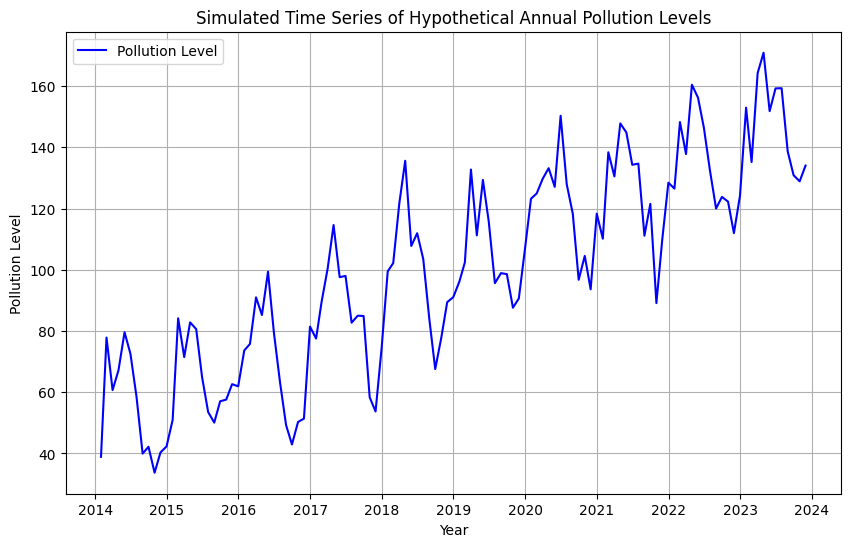

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate time stamps for 10 years
start_date = '2014-01-01'
end_date = '2023-12-01'
timestamps = pd.date_range(start=start_date, end=end_date, freq='M')

# Simulate trend component
trend = np.linspace(50, 150, len(timestamps))  # Example increasing trend

# Simulate seasonality component
seasonality = np.sin(np.arange(len(timestamps)) * (2 * np.pi / 12)) * 20  # Example sine wave with amplitude 20

# Simulate noise (random fluctuations)
noise = np.random.normal(loc=0, scale=10, size=len(timestamps))  # Example normal distribution noise

# Combine components to generate time series data
pollution_levels = trend + seasonality + noise

# Create DataFrame
data = {'Timestamp': timestamps, 'Pollution Level': pollution_levels}
df = pd.DataFrame(data)

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df['Timestamp'], df['Pollution Level'], label='Pollution Level', color='blue')
plt.title('Simulated Time Series of Hypothetical Annual Pollution Levels')
plt.xlabel('Year')
plt.ylabel('Pollution Level')
plt.legend()
plt.grid(True)
plt.show()


#2.	Stationarity Testing:

In [18]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(df['Pollution Level'])

# Print test statistic and p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Print critical values
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {:.3f}'.format(key, value))

# Interpret the results
if result[1] < 0.05:
    print("The time series is stationary (reject the null hypothesis)")
else:
    print("The time series is non-stationary (fail to reject the null hypothesis)")


ADF Statistic: -0.09551028782749568
p-value: 0.9498838941027243
Critical Values:
	1%: -3.494
	5%: -2.889
	10%: -2.582
The time series is non-stationary (fail to reject the null hypothesis)


#3.	ARIMA Model Identification:


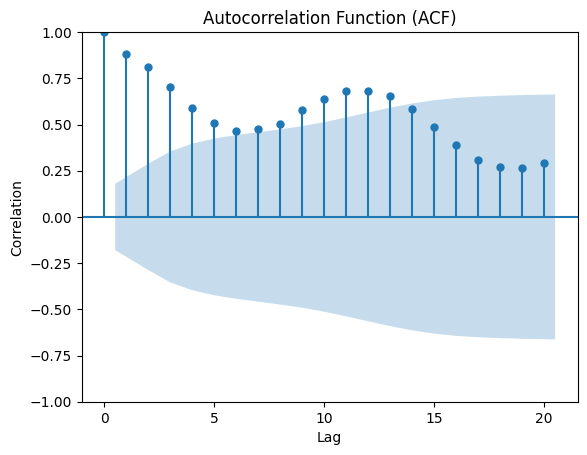

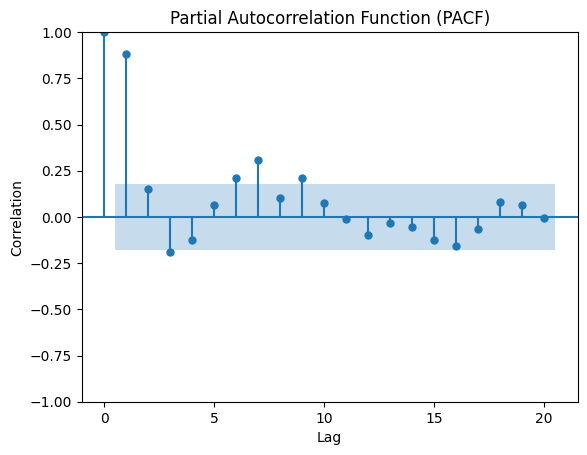

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot autocorrelation function (ACF)
plot_acf(df['Pollution Level'], lags=20)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.show()

# Plot partial autocorrelation function (PACF)
plot_pacf(df['Pollution Level'], lags=20)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.show()


#4.	ARIMA Model Fitting:

Root Mean Squared Error (RMSE): 15.093193512598004


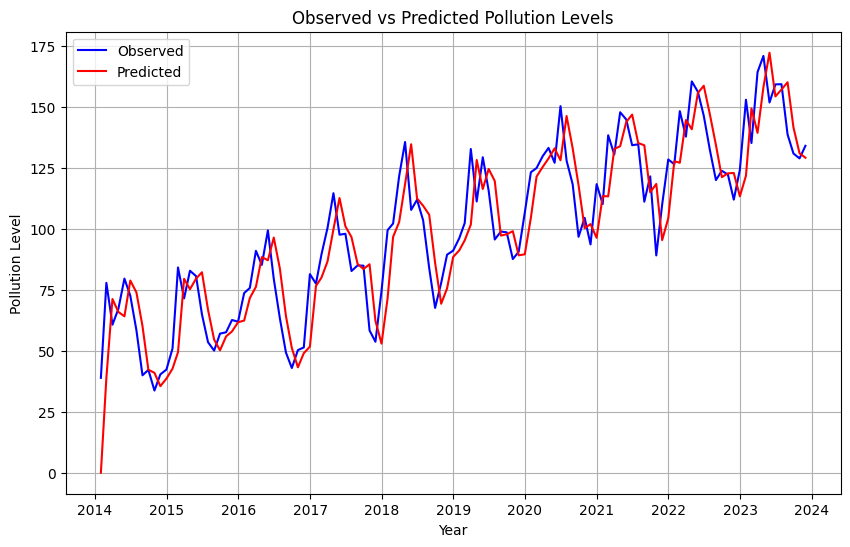

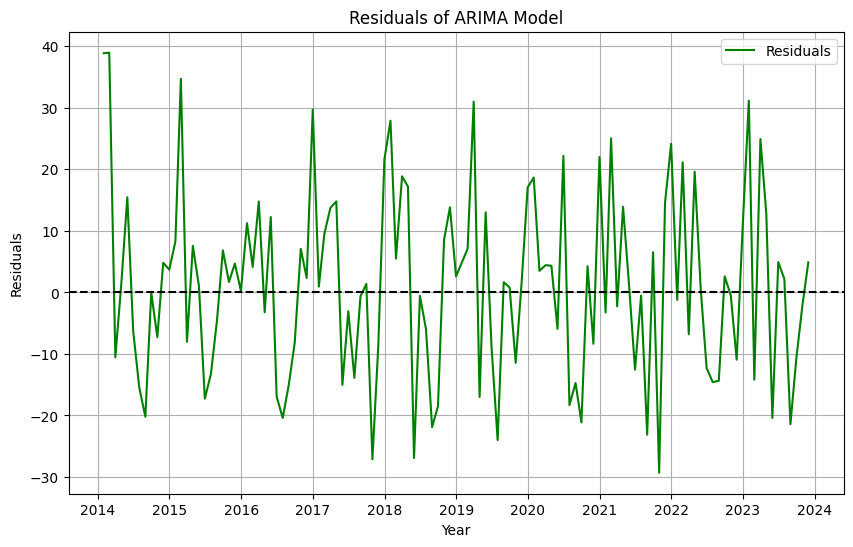

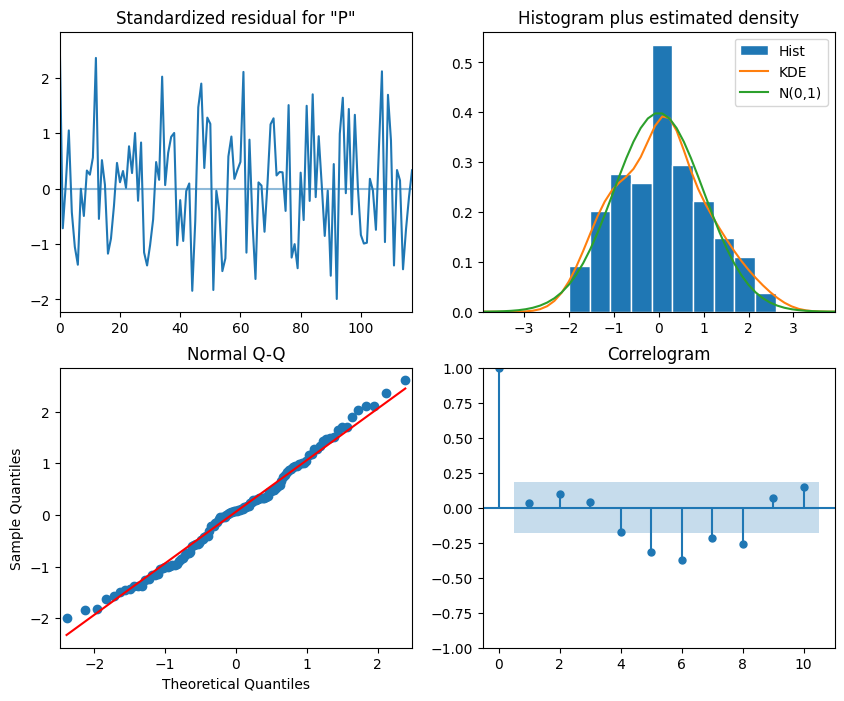

In [20]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Identified ARIMA parameters
p = 1  # AR order
d = 1  # Differencing order
q = 1  # MA order

# Fit ARIMA model
model = ARIMA(df['Pollution Level'], order=(p, d, q))
fit_model = model.fit()

# Generate predictions
predictions = fit_model.predict(typ='levels')

# Calculate RMSE
rmse = mean_squared_error(df['Pollution Level'], predictions, squared=False)
print('Root Mean Squared Error (RMSE):', rmse)

# Plot observed vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(df['Timestamp'], df['Pollution Level'], label='Observed', color='blue')
plt.plot(df['Timestamp'], predictions, label='Predicted', color='red')
plt.title('Observed vs Predicted Pollution Levels')
plt.xlabel('Year')
plt.ylabel('Pollution Level')
plt.legend()
plt.grid(True)
plt.show()

# Plot residuals
residuals = df['Pollution Level'] - predictions
plt.figure(figsize=(10, 6))
plt.plot(df['Timestamp'], residuals, label='Residuals', color='green')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals of ARIMA Model')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()

# Plot diagnostics of the fitted model
fit_model.plot_diagnostics(figsize=(10, 8))
plt.show()


#5.	Forecasting: